# HU Extension       Assignment 11             E63 Big Data Analytics 		                  	
## Handed out: 04/14/2023                           Due by 11:59 PM EST on Saturday, 04/22/2023
### Emmanuel Aboah

Please review the lab notes and spaCy documentation. Search for API calls you need to solve problems below. 

# Problem 1. 

On slides 77 of the lecture notes we presented compilation of Word2Vec code. Please repeat the process. Subsequently run the script demo-word.sh. The script will download text8.zip file and generate file vectors.bin which contains “embedded” vectors of all the words contained in text8. In subsequent operation of demo-word.sh script discover and report on the words most similar to words: car and helicopter. 

Training using words from Text8

```bash
(base) manny@LAPTOP-85L1BUVJ:~/dev/cscie-63/hw11_nlp/data/word2vec/trunk$ bash demo-word.sh
make: Nothing to be done for 'all'.
--2023-04-18 22:31:58--  http://mattmahoney.net/dc/text8.zip
Resolving mattmahoney.net (mattmahoney.net)... 34.198.1.81
Connecting to mattmahoney.net (mattmahoney.net)|34.198.1.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31344016 (30M) [application/zip]
Saving to: ‘text8.gz’

text8.gz                                               100%[==========================================================================================================================>]  29.89M  15.7MB/s    in 1.9s    

2023-04-18 22:32:00 (15.7 MB/s) - ‘text8.gz’ saved [31344016/31344016]

Starting training using file text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000005  Progress: 100.10%  Words/thread/sec: 25.96k  
real    20m34.600s
user    160m4.209s
sys     1m9.675s
```

Words similar to car:

```bash
Word: car  Position in vocabulary: 983

                                              Word       Cosine distance
------------------------------------------------------------------------
                                              cars              0.694823
                                            driver              0.611626
                                             truck              0.588277
                                             racer              0.586039
                                           minivan              0.553033
                                               cab              0.552238
                                              taxi              0.546186
                                        motorcycle              0.545445
                                            hearse              0.543518
                                        volkswagen              0.543434
                                             sedan              0.533427
                                           porsche              0.532194
                                           racecar              0.531415
                                            lancia              0.525834
                                          motorist              0.525601
                                        limousines              0.522606
                                          dragster              0.518395
                                             miata              0.516123
                                        automobile              0.515409
                                             raced              0.514428
                                         chevrolet              0.514216
                                           vehicle              0.506262
                                       dealerships              0.504052
                                             volvo              0.500540
                                            chases              0.498839
                                            nascar              0.498401
                                           chassis              0.494342
                                           daytona              0.492534
                                             acura              0.487323
                                            parked              0.486701
                                       motorcycles              0.485733
                                              alfa              0.485234
                                           railcar              0.483240
                                              mans              0.482236
                                           sidecar              0.480377
                                              tire              0.479335
                                            sauber              0.477576
                                              opel              0.477267
                                            toyota              0.477137
                                        headlights              0.475675
```

Words similar to helicopter:

```bash
Enter word or sentence (EXIT to break): helicopter

Word: helicopter  Position in vocabulary: 8551

                                              Word       Cosine distance
------------------------------------------------------------------------
                                       helicopters              0.674296
                                          aircraft              0.627731
                                    reconnaissance              0.593930
                                               cva              0.540835
                                        parachutes              0.538379
                                           gazelle              0.536132
                                              usmc              0.535803
                                          airplane              0.527674
                                         airplanes              0.526171
                                          seaplane              0.525755
                                           copilot              0.524466
                                            gunner              0.520858
                                          sikorsky              0.520561
                                          commando              0.518783
                                               tbm              0.510001
                                            patrol              0.507967
                                      antiaircraft              0.507943
                                           piloted              0.506119
                                              stol              0.505247
                                            bomber              0.505086
                                           tomcats              0.503679
                                           harpoon              0.503430
                                           landing              0.502375
                                               raf              0.502359
                                        refuelling              0.502079
                                          airliner              0.501791
                                        aerobatics              0.500900
                                           escorts              0.500335
                                               aft              0.499938
                                              vtol              0.498782
                                          harriers              0.498616
                                         commandos              0.497318
                                         aerobatic              0.496889
                                            sentry              0.495528
                                          hijacked              0.494324
                                             winch              0.493817
                                         refueling              0.493651
                                            aerial              0.492738
                                         submarine              0.491235
                                             pilot              0.490791
```

# Problem 2.
Use NLTK to generate basic statistics about the content of text8. If your memory is small work with the first 10% of the text8 file. Find the total number of words, the total number of different words. Plot the frequency distribution of the first 50 words. Transform that plot into log-log plot.

Find the total number of words

In [12]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/manny/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# Using a subset of the text8 file due to size
file_content = open("./data/word2vec/trunk/text8").read(10000)

tokens = nltk.word_tokenize(file_content)

print(f"Total number of words: [{len(tokens)}]")

Total number of words: [1603]


In [14]:
# The total number of different words using set (unordered)

unique_words = list(set(tokens))

print(len(unique_words))

628


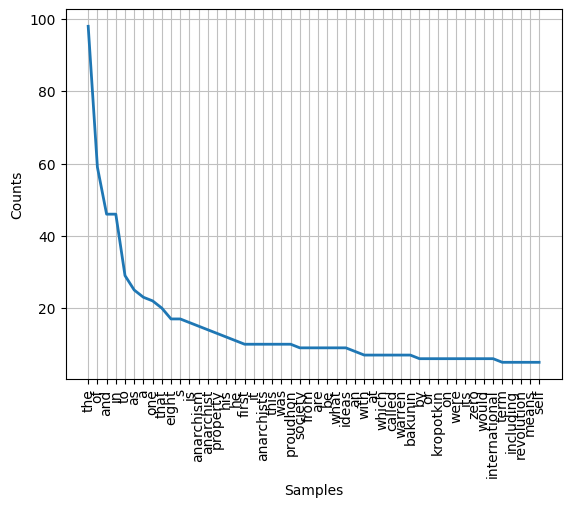

<Axes: xlabel='Samples', ylabel='Counts'>

In [15]:
# Plot the frequency distribution of the first 50 words
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

freq_dist = FreqDist(tokens)

freq_dist.plot(50, cumulative=False)

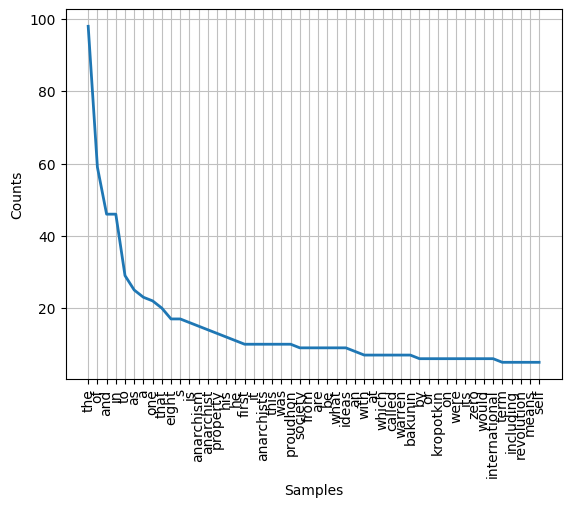

<Axes: xlabel='Samples', ylabel='Counts'>

In [16]:
freq_dist.plot(50, cumulative=False)

In [17]:
# Transform that plot into log-log plot

keys = freq_dist.keys()

values = freq_dist.values()

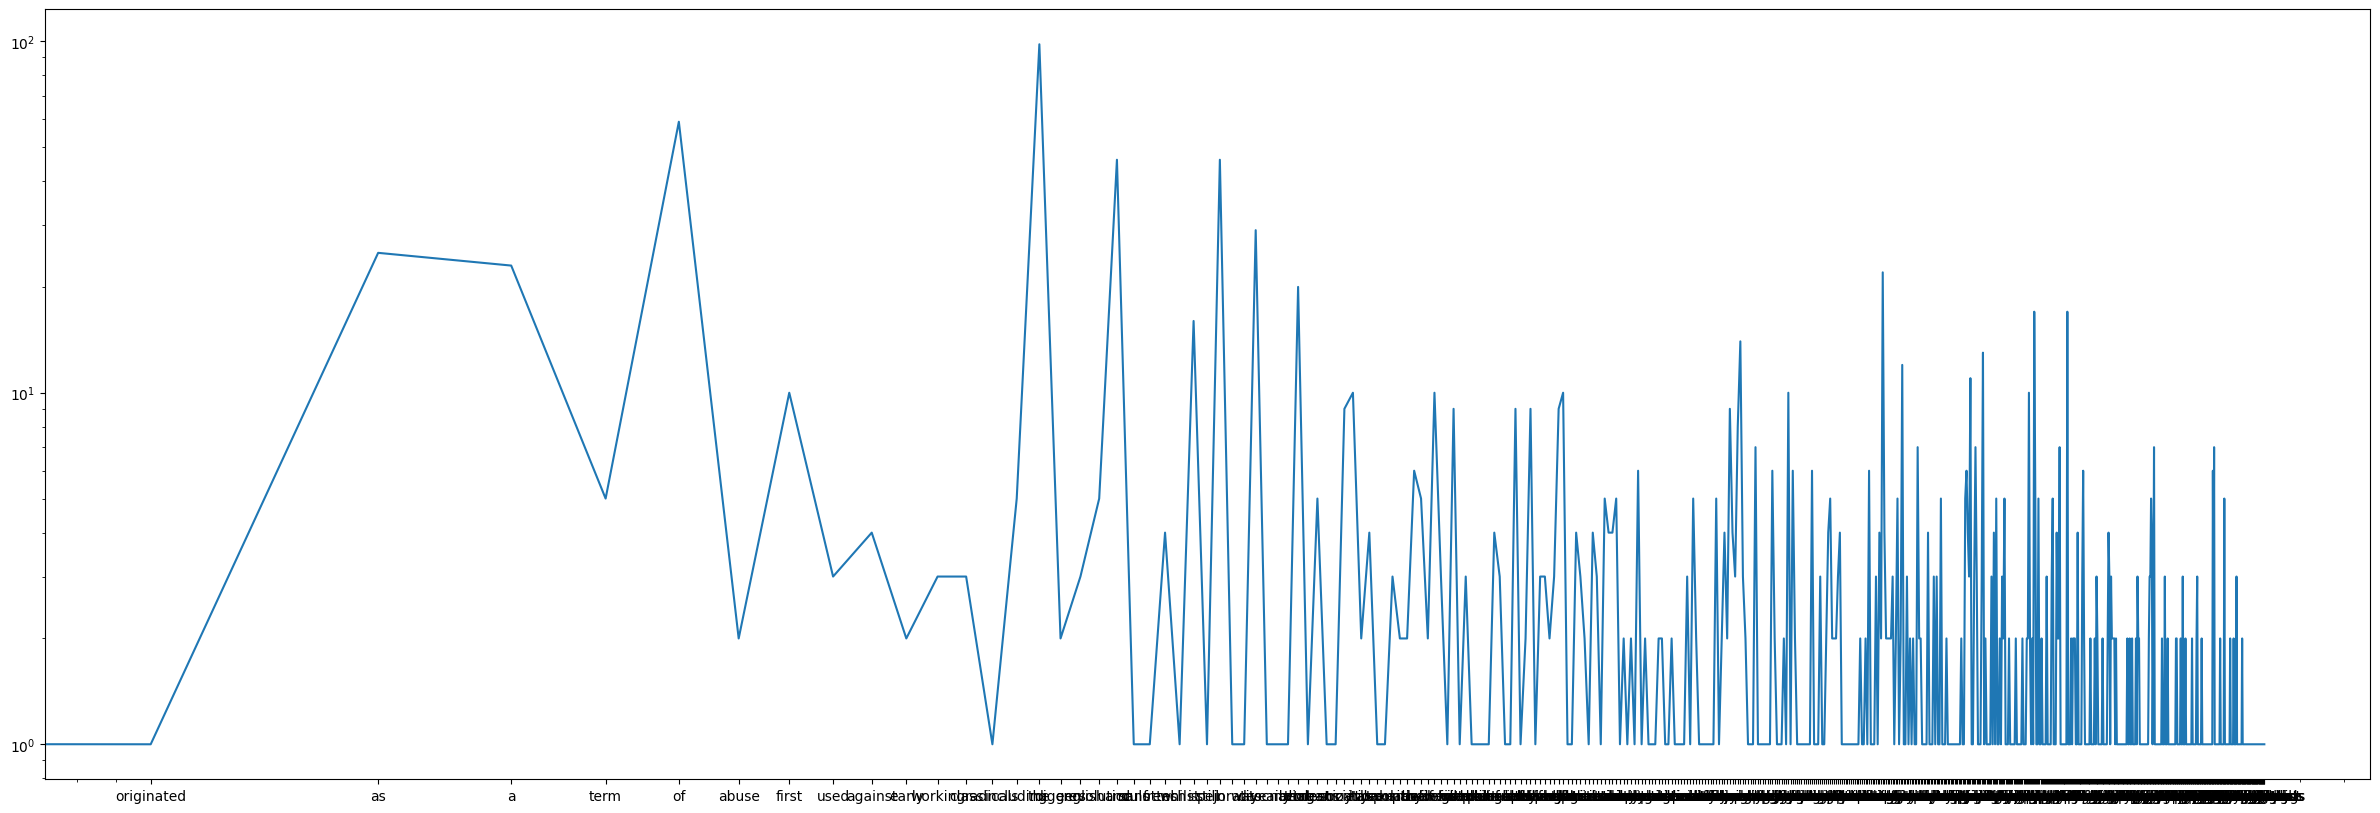

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
plt.loglog(list(keys), list(values))

In [77]:
import pandas as pd
from IPython.display import display

df = pd.DataFrame({
    "keys": list(keys),
    "values": list(values)
})

df = df.sort_values(by=["keys"])

display(df)

,keys,values
3,a,23
68,abolished,1
124,about,4
521,abundance,1
6,abuse,2
...,...,...
535,yarros,1
459,years,2
291,yet,1
183,zeno,2


# Problem 3. 
Use script word-analogy.sh with vectors.bin file containing embedded vectors discover what is the result of following vector calculations: emperor – man + woman, and sun – rays + moon. Please make a few experiments in analogic reasoning on your own.

### emperor – man + woman

```bash
(BDA2023) manny@LAPTOP-85L1BUVJ:~/dev/cscie-63/hw11_nlp/data/word2vec/trunk$ ./word-analogy vectors.bin
Enter three words (EXIT to break): emperor man woman

Word: emperor  Position in vocabulary: 526

Word: man  Position in vocabulary: 243

Word: woman  Position in vocabulary: 1013

                                              Word              Distance
------------------------------------------------------------------------
                                              girl              0.538541
                                              maid              0.509625
                                        tenderness              0.465732
                                        prostitute              0.458639
                                             femme              0.453591
                                            lovely              0.451247
                                            blonde              0.443612
                                              sexy              0.442413
                                         beautiful              0.439744
                                     compassionate              0.439627
                                          brunette              0.436927
                                            kisses              0.436057
                                          stranger              0.434866
                                             senex              0.428787
                                             madam              0.426228
                                               she              0.423313
                                           herself              0.421302
                                            steamy              0.420830
                                            bionic              0.419278
                                            sailor              0.416435
                                            thighs              0.415321
                                      marriageable              0.415165
                                            grumpy              0.411240
                                             young              0.409232
                                            raping              0.407991
                                             women              0.407897
                                              love              0.407647
                                              dumb              0.405911
                                             loves              0.404103
                                            skinny              0.403336
                                          westenra              0.399861
                                              baby              0.395392
                                        headstrong              0.394498
                                            wonder              0.393474
                                         womanhood              0.392322
                                             maids              0.391191
                                        femininity              0.388406
                                        girlfriend              0.388023
                                        mismeasure              0.387328
                                         persuades              0.385602
```

###  sun rays moon

```bash
Word: sun  Position in vocabulary: 906

Word: rays  Position in vocabulary: 5227

Word: moon  Position in vocabulary: 950

                                              Word              Distance
------------------------------------------------------------------------
                                           craters              0.433755
                                               ray              0.429807
                                                uv              0.421282
                                       ultraviolet              0.384500
                                            lasers              0.380706
                                   crystallography              0.372517
                                          detector              0.371600
                                         radiation              0.369947
                                       wavelengths              0.369722
                                         cherenkov              0.369709
                                       diffraction              0.366909
                                     magnification              0.362427
                                              beam              0.362232
                                        microscopy              0.355757
                                     birefringence              0.355709
                                           glowing              0.355070
                                      fluorescence              0.353157
                                         shielding              0.349219
                                     radioactivity              0.342482
                                        penetrates              0.341205
                                          tektites              0.337912
                                        spacecraft              0.335767
                                             sonar              0.335630
                                        ionization              0.335314
                                        ionosphere              0.334675
                                               nlt              0.332515
                                              lens              0.332361
                                             gamma              0.329992
                                             lunar              0.328898
                                           optical              0.327872
                                          crystals              0.327843
                                   phosphorescence              0.327709
                                          antennae              0.326201
                                          metallic              0.324258
                                        refraction              0.323382
                                        subsurface              0.323296
                                    phosphorescent              0.321875
                                         refracted              0.321064
                                            lenses              0.320887
                                        kryptonite              0.320362
```

### cat dog man

```bash
Enter three words (EXIT to break): cat dog man

Word: cat  Position in vocabulary: 2601

Word: dog  Position in vocabulary: 1902

Word: man  Position in vocabulary: 243

                                              Word              Distance
------------------------------------------------------------------------
                                               lad              0.438245
                                             woman              0.433326
                                          immortal              0.419434
                                             yours              0.414060
                                               him              0.412001
                                            amazed              0.408391
                                                my              0.406043
                                                me              0.405696
                                          cowardly              0.401930
                                                he              0.401483
                                              pity              0.396934
                                        stepmother              0.396243
                                             cried              0.392240
                                           himself              0.392037
                                         greatness              0.391490
                                          terribly              0.391284
                                             bitch              0.390348
                                               god              0.388386
                                         whosoever              0.385995
                                               son              0.384263
                                              thou              0.381091
                                            aegeus              0.380360
                                           foolish              0.377417
                                              hath              0.375133
                                           misfits              0.373063
                                         supposing              0.371587
                                              wept              0.371232
                                          merciful              0.370956
                                              rags              0.370646
                                            beggar              0.370241
                                              dear              0.369857
                                           weeping              0.369697
                                            behold              0.367158
                                           dreamed              0.366990
                                              love              0.366883
                                         exclaimed              0.365976
                                          redeemer              0.365544
                                           arachne              0.365113
                                        misfortune              0.365044
                                           parable              0.363678
```

### apology dismay unhappy

Enter three words (EXIT to break): apology dismay unhappy

Word: apology  Position in vocabulary: 13642

Word: dismay  Position in vocabulary: 21485

Word: unhappy  Position in vocabulary: 12145

                                              Word              Distance
------------------------------------------------------------------------
                                          disliked              0.445906
                                         alienated              0.437930
                                      dissatisfied              0.426976
                                      disappointed              0.423920
                                      disenchanted              0.393906
                                        frustrated              0.389310
                                              felt              0.387769
                                    disappointment              0.377196
                                             upset              0.376790
                                          outraged              0.374964
                                          despised              0.374662
                                         surprised              0.374153
                                         struggled              0.371406
                                             liked              0.371215
                                          saddened              0.367054
                                        resentment              0.364195
                                     disillusioned              0.361725
                                           stardom              0.361389
                                            minded              0.360359
                                          talented              0.359679
                                        enthusiasm              0.358174
                                         unpopular              0.357615
                                      enthusiastic              0.357531
                                              wary              0.352114
                                            afraid              0.351882
                                        interested              0.351012
                                          troubled              0.349491
                                          complain              0.348559
                                         attracted              0.347363
                                         disgusted              0.346981
                                           fearful              0.346235
                                             hated              0.345316
                                            worked              0.344395
                                             joked              0.343875
                                             loved              0.343622
                                             happy              0.343335
                                        complained              0.341108
                                          insulted              0.339813
                                       comfortable              0.339759
                                       emotionally              0.338661

# Problem 4. 
Find a way to repeat test in Problem 1 using spaCy. Perform tests with small and large language model separately. Report results.

I am using a subset of the text8 file as used in problem 2

Small module

In [20]:
import spacy

nlp = spacy.load("en_core_web_sm")

s_tokens = nlp(file_content)

print(s_tokens[2:10])

originated as a term of abuse first used


In [26]:
# words similar to car
car_token = nlp(u"car")

car_similarity_dict = {}

for tkn in s_tokens:
    if tkn.similarity(car_token) > 0.4: # limiting to > 0.4 similarity
        car_similarity_dict[tkn.text] = tkn.similarity(car_token)

car_similarity_dict

/tmp/ipykernel_14249/458977492.py:7: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  if tkn.similarity(car_token) > 0.4:
/tmp/ipykernel_14249/458977492.py:8: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the la

{'anarchism': 0.4015505675578386,
 'term': 0.4030474506204749,
 'abuse': 0.42372056071242264,
 'revolution': 0.4206952210516923,
 'way': 0.42718958363966836,
 'label': 0.5855948976936391,
 'philosophy': 0.43660773949719195,
 'elimination': 0.43342842223287603,
 'word': 0.43719488585073185,
 'anarchy': 0.4172210075719877,
 'society': 0.4139757402614361,
 'association': 0.46267095762731664,
 'respect': 0.4366064671929179,
 'division': 0.42930240115912677,
 'law': 0.47005602592425827,
 'organisation': 0.46333419578263274,
 'taoism': 0.4159691873028546,
 'omnipotence': 0.4505178251056038,
 'century': 0.4442542401685434,
 'man': 0.4369592483591007,
 'era': 0.5474130283541992,
 'godwin': 0.4225493772240662,
 'book': 0.4530451948499516,
 'text': 0.4564564358297495,
 'point': 0.4159945607937568,
 'insult': 0.5001164049837877,
 'proudhon': 0.40112530627818427,
 'description': 0.48263794672537325,
 'reason': 0.48622480701172405,
 'theory': 0.4018947106687372,
 'property': 0.43615235379641404,
 '

In [31]:
# words similar to helicopter
heli_token = nlp(u"helicopter")

heli_similarity_dict = {}

for tkn in s_tokens:
    if tkn.similarity(heli_token) > 0.4: # limiting to > 0.4 similarity
        heli_similarity_dict[tkn.text] = tkn.similarity(heli_token)

heli_similarity_dict


/tmp/ipykernel_14249/3923318613.py:7: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  if tkn.similarity(heli_token) > 0.4: # limiting to > 40% similarity
/tmp/ipykernel_14249/3923318613.py:8: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own 

{'anarchism': 0.4287964645918358,
 'label': 0.4738320402801815,
 'philosophy': 0.45640637847765214,
 'anarchy': 0.4023513957324102,
 'nihilism': 0.41501823003282745,
 'society': 0.4225602922728602,
 'wealth': 0.44383277277580513,
 'organisation': 0.43831635707899413,
 'history': 0.4058741190925291,
 'chaos': 0.4890259527355889,
 'property': 0.4043296037000785,
 'text': 0.4336090592014902,
 'proudhon': 0.4514042082186833,
 'profit': 0.46750156363484885,
 'vision': 0.4129085017984703,
 'interest': 0.426185353944003,
 'number': 0.44584452615918513,
 'stirner': 0.4118497741683733,
 'egoism': 0.4354084722044563,
 'form': 0.4414525686207967,
 'holder': 0.4427272184985445,
 'experiment': 0.4337953434629426,
 'harmony': 0.410352582743639,
 'man': 0.4539081654613923,
 'conception': 0.4327513214524705,
 'limit': 0.4473489486161288,
 'economy': 0.4216087822096397,
 'system': 0.4769036672108692,
 'labor': 0.4369844401955673,
 'figure': 0.4801067856766803,
 'association': 0.4551999992627386,
 'diff

Large module

In [23]:
_nlp = spacy.load("en_core_web_lg")

l_tokens = _nlp(file_content)

print(l_tokens[2:10])

originated as a term of abuse first used


In [32]:
# words similar to car -- Large
_car_token = _nlp(u"car")

_car_similarity_dict = {}

for tkn in l_tokens:
    if tkn.similarity(_car_token) > 0.2: # limiting to > 0.20 similarity
        _car_similarity_dict[tkn.text] = tkn.similarity(_car_token)

_car_similarity_dict

/tmp/ipykernel_14249/3980168436.py:7: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  if tkn.similarity(_car_token) > 0.2: # limiting to > 20% similarity


{'diggers': 0.20607845758220872,
 'whilst': 0.22128849710557735,
 'way': 0.2566618130606417,
 'it': 0.248271946021776,
 'up': 0.23025292771472441,
 'place': 0.23997116636908408,
 'autonomous': 0.20010120861249994,
 'while': 0.2242383839572327,
 'easily': 0.2231226876662932,
 'before': 0.22987009750717768,
 'man': 0.24825453930192265,
 'time': 0.2293674333816278,
 'something': 0.23823323151527154,
 'property': 0.299001577033816,
 'theft': 0.2709789936479263,
 'owners': 0.2282640210561325,
 'goods': 0.3109739176879034,
 'bank': 0.24005405582961045,
 'here': 0.2457914891330801,
 'right': 0.22020501722689928,
 'mind': 0.2103893594453385,
 'when': 0.30018926516867084,
 'him': 0.23517634880098687,
 'whoever': 0.20566954878690963,
 'thing': 0.24390686094125422,
 'never': 0.20767529462518675,
 'cost': 0.20291898210441803,
 'price': 0.24655378698877395,
 'market': 0.22348720139584172,
 'start': 0.21638036474144764,
 'around': 0.2158705383343858,
 'away': 0.27258346581534926}

In [35]:
# words similar to helicopter -- Large
_heli_token = _nlp(u"helicopter")

_heli_similarity_dict = {}

for tkn in l_tokens:
    if tkn.similarity(_heli_token) > 0.2: # limiting to > 0.2 similarity
        _heli_similarity_dict[tkn.text] = tkn.similarity(_heli_token)

_heli_similarity_dict

/tmp/ipykernel_14249/3822320148.py:7: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  if tkn.similarity(_heli_token) > 0.2:


{'the': 0.2086940083656219,
 'destroy': 0.21043132874275716,
 'from': 0.2104459813461568,
 'autonomous': 0.2912145192258559,
 'aid': 0.24685659744909258,
 'while': 0.22895394578404885,
 'before': 0.28471042712278555,
 'hunter': 0.21384540129888907,
 'division': 0.2239705538292165,
 'regimentation': 0.22986111783393906,
 'guided': 0.23773230611263985,
 'arrive': 0.27389899686836783,
 'during': 0.21248946828794318,
 'voyages': 0.21774263674788763,
 'where': 0.23610834497288136,
 'private': 0.21391060129831194,
 'later': 0.20458390524696476,
 'eight': 0.23868020140227197,
 'operative': 0.21879487631128577,
 'over': 0.2159470120009701,
 'here': 0.20487992491748921,
 'when': 0.24063118252104226,
 'through': 0.22991744275533565,
 'headed': 0.27445863438706375,
 'proceeded': 0.2646230732235105,
 'shortly': 0.2879405744882993,
 'after': 0.27707057394278806,
 'camps': 0.23020015643051123,
 'clearest': 0.23085068620539523,
 'around': 0.24943280123671585,
 'direct': 0.2009322720056618}

# Problem 5. 

Find a way to repeat tests in Problem 3 using spaCy API. Perform tests with small and large language model separately. First load small model do the test. You’re your client, restart it, load the large model. This to avoid potential issues with limited memory. Report results.

large model

In [42]:
from scipy import spatial

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

emperor - man + woman

In [46]:
nlp = spacy.load("en_core_web_lg")

emperor = nlp.vocab["emperor"].vector
man = nlp.vocab["man"].vector
woman = nlp.vocab["woman"].vector

# Vector word algebra
new_wrd_vec = emperor - man + woman

similar_comp = []

for word in nlp.vocab:
    # Ignore word without vectors and mixed-case words
    if word.has_vector and word.is_lower and word.is_alpha:
        sim = cosine_similarity(new_wrd_vec, word.vector)
        similar_comp.append((word, sim))

similar_comp = sorted(similar_comp, key=lambda item: -item[1])

In [53]:
# display computed similarities
def display_res(similar_comp: list):
    comp_dict = {}
    for sc in similar_comp:
        comp_dict[sc[0].text] = sc[1]
    return {k: comp_dict[k] for k in list(comp_dict)[:5]}

In [54]:
display_res(similar_comp=similar_comp)

{'emperor': 0.696029543876648,
 'she': 0.3076379895210266,
 'was': 0.22636663913726807,
 'were': 0.18079549074172974,
 'woman': 0.1770593822002411}

sun - rays + moon

In [55]:
sun = nlp.vocab["sun"].vector
rays = nlp.vocab["rays"].vector
moon = nlp.vocab["moon"].vector

# Vector word algebra
new_wrd_vec = sun - rays + moon

similar_comp = []

for word in nlp.vocab:
    # Ignore word without vectors and mixed-case words
    if word.has_vector and word.is_lower and word.is_alpha:
        sim = cosine_similarity(new_wrd_vec, word.vector)
        similar_comp.append((word, sim))

similar_comp = sorted(similar_comp, key=lambda item: -item[1])

In [56]:
display_res(similar_comp=similar_comp)

{'sun': 0.8046422004699707,
 'moon': 0.7987746000289917,
 'it': 0.23951277136802673,
 'man': 0.1856335997581482,
 'this': 0.1724732220172882}

Small model it doesn't appear to have vectors 🤷🏾‍♂️

In [64]:
nlp_sm = spacy.load("en_core_web_sm")

In [67]:
emperor = nlp_sm("emperor")
man = nlp_sm("man")
woman = nlp_sm("woman")

# Vector word algebra
new_wrd_vec = emperor.vector - man.vector + woman.vector

similar_comp = []

for word in nlp_sm.vocab:
    # Ignore word without vectors and mixed-case words
    if word.has_vector and word.is_lower and word.is_alpha:
        sim = cosine_similarity(new_wrd_vec, word.vector)
        similar_comp.append((word, sim))

similar_comp = sorted(similar_comp, key=lambda item: -item[1])

In [68]:
display_res(similar_comp=similar_comp)

{}

In [71]:
food = nlp_sm("food")
meal = nlp_sm("meal")
dog = nlp_sm("dog")

# Vector word algebra
new_wrd_vec = dog.vector - meal.vector + food.vector

similar_comp = []

for word in nlp_sm.vocab:
    # Ignore word without vectors and mixed-case words
    if word.has_vector and word.is_lower and word.is_alpha:
        sim = cosine_similarity(new_wrd_vec, word.vector)
        similar_comp.append((word, sim))

similar_comp = sorted(similar_comp, key=lambda item: -item[1])

In [72]:
display_res(similar_comp=similar_comp)

{}